## 通し課題➀ クラス分類

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. データの読み込みとデータ表示

In [19]:
df = pd.read_csv('input/ks-projects-201801.csv')

In [20]:
display(df.head(5))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [21]:
display(df.describe())
print(df.info())
print(df.isnull().sum())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   

In [22]:
# state列のsuccessfulをTrue、それ以外をFalseに割り振る
df['state'] = (df['state'] == 'successful')

# deadlineとlaunchedから新しい特徴量durationを作成
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['duration'] = (df['deadline'] - df['launched']).dt.days
df.head(8)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,US,1.0,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,US,1283.0,1283.0,19500.00,55
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,True,224,US,52375.0,52375.0,50000.00,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,True,16,US,1205.0,1205.0,1000.00,19
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,False,40,US,453.0,453.0,25000.00,44


### 2. データの可視化 (省略)

### 3. データの前処理

In [23]:
# 不要な列の削除
drop_columns_list = ['ID', 'name', 'goal', 'pledged', 'usd pledged', 'deadline', 'launched', 'category']
df.drop(drop_columns_list, axis=1, inplace=True)

# カテゴリ変数を数値に変換する
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_feature = ['main_category', 'currency', 'country']
df[categorical_feature] = df[categorical_feature].apply(encoder.fit_transform)

base_df = df

In [24]:
display(base_df.head(8))
display(base_df.describe())
base_df.info()

,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real,duration
0,12,5,False,0,9,0.0,1533.95,58
1,6,13,False,15,22,2421.0,30000.00,59
2,6,13,False,3,22,220.0,45000.00,44
3,10,13,False,1,22,1.0,5000.00,29
4,6,13,False,14,22,1283.0,19500.00,55
5,7,13,True,224,22,52375.0,50000.00,34
6,7,13,True,16,22,1205.0,1000.00,19
7,7,13,False,40,22,453.0,25000.00,44


,main_category,currency,backers,country,usd_pledged_real,usd_goal_real,duration
count,378661.000000,378661.000000,378661.000000,378661.000000,3.786610e+05,3.786610e+05,378661.000000
mean,7.513010,11.000578,105.617476,18.850764,9.058924e+03,4.545440e+04,33.481122
std,3.904719,3.944783,907.185035,6.270406,9.097334e+04,1.152950e+06,65.909172
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,5.000000,13.000000,2.000000,22.000000,3.100000e+01,2.000000e+03,29.000000
50%,7.000000,13.000000,12.000000,22.000000,6.243300e+02,5.500000e+03,29.000000
75%,10.000000,13.000000,56.000000,22.000000,4.050000e+03,1.550000e+04,36.000000
max,14.000000,13.000000,219382.000000,22.000000,2.033899e+07,1.663614e+08,16738.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 8 columns):
main_category       378661 non-null int32
currency            378661 non-null int32
state               378661 non-null bool
backers             378661 non-null int64
country             378661 non-null int32
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
duration            378661 non-null int64
dtypes: bool(1), float64(2), int32(3), int64(2)
memory usage: 16.3 MB


L1正則化による特徴選択（埋め込み法）

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [26]:
estimator = LassoCV(normalize=True, cv=5)
sfm = SelectFromModel(estimator, threshold=1e-5)

X_columns = base_df.drop('state', axis=1).columns

X = base_df.drop('state', axis=1).values
y = base_df['state'].values

# fitで特徴選択を実行
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [27]:
# 削除すべき特徴の名前を取得 
removed_idx  = ~sfm.get_support()
X_columns[removed_idx]

Index(['country', 'usd_pledged_real', 'usd_goal_real'], dtype='object')

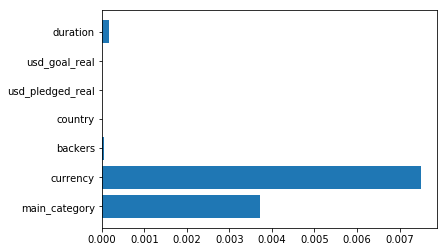

In [28]:
# LASSOで得た各特徴の係数の値を確認してみよう
# 係数の絶対値を取得
abs_coef = np.abs(sfm.estimator_.coef_)
# 係数を棒グラフで表示
plt.barh(np.arange(0, len(abs_coef)), abs_coef, tick_label=X_columns.values)
plt.show()

In [30]:
feature_selection_df = base_df.drop(list(X_columns[removed_idx]), axis=1)
feature_selection_df.head(5)

,main_category,currency,state,backers,duration
0,12,5,False,0,58
1,6,13,False,15,59
2,6,13,False,3,44
3,10,13,False,1,29
4,6,13,False,14,55


### 4. モデルの評価
#### 4.1 ロジスティック回帰の学習

base_dfとfeature_selection_dfのどちらがよい説明変数になっているか比較する

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [32]:
def train_model(X, y, model_name='svm', use_scaler=False):
    '''
    k-交差検証法によるモデル評価
    '''
    n_split = 5

    cross_valid_accuracy = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=2020).split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        if use_scaler:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        if model_name == 'svm':
            model = SVC(C=10, kernel='rbf', gamma='scale')
        elif model_name == 'rf':
            clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini", min_samples_leaf=2, min_samples_split=2, random_state=2020)
        elif model_name == 'ada':
            clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=2020, criterion="gini"), n_estimators=10, random_state=1234)
        else:
            model = SGDClassifier(loss='log', penalty='l2', max_iter=10000, fit_intercept=True, random_state=2020, tol=1e-3)
        
        model.fit(X_train, y_train)

        # テストデータに対する予測
        y_pred_test = model.predict(X_test)
        
        # テストデータに対する正答率を計算
        accuracy =  accuracy_score(y_test, y_pred_test)
        print("Fold %s"%split_num)
        print('正答率（Accuracy） = {:.3f}%\n'.format(100 * accuracy))
        
        cross_valid_accuracy += accuracy
        split_num += 1

    # 平均正答率を最終的な汎化誤差値とする
    final_accuracy = cross_valid_accuracy / n_split
    print('Cross Validation Accuracy = {:.3f}%'.format(100 * final_accuracy))

In [33]:
# base_df
X = base_df.drop('state', axis=1).values
y = base_df['state'].values
train_model(X, y, model_name='log_regr', use_scaler=False)

Fold 1
正答率（Accuracy） = 96.036%

Fold 2
正答率（Accuracy） = 99.123%

Fold 3
正答率（Accuracy） = 97.471%

Fold 4
正答率（Accuracy） = 99.099%

Fold 5
正答率（Accuracy） = 99.095%

Cross Validation Accuracy = 98.165%


In [34]:
# feature_section_df
X = feature_selection_df.drop('state', axis=1).values
y = feature_selection_df['state'].values
train_model(X, y, model_name='log_regr', use_scaler=False)

Fold 1
正答率（Accuracy） = 79.605%

Fold 2
正答率（Accuracy） = 82.037%

Fold 3
正答率（Accuracy） = 84.400%

Fold 4
正答率（Accuracy） = 76.272%

Fold 5
正答率（Accuracy） = 83.547%

Cross Validation Accuracy = 81.172%


base_dfの方が優れた説明変数であることが分かる。  
したがって、これまで通りbase_dfを使ってモデルを学習させる。

グリッド探索で精度が上がるハイパーパラメータを探す。

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, shuffle=True)
parameters = {'penalty':['l1', 'l2'], 'alpha':[0.001, 0.01, 0.1, 1, 10],'loss':['log']}
model = SGDClassifier(random_state=2020)
clf = GridSearchCV(model, parameters, cv=5, verbose=2, n_jobs=8)
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    3.3s finished
{'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}


In [20]:
# ロジスティック回帰の最終モデル
model = SGDClassifier(**clf.best_params_, max_iter=10000, fit_intercept=True, tol=1e-3)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
def evaluate_model(model, X, y):
    '''
    モデルを評価する
    '''
    # ラベルを予測
    y_pred = model.predict(X)

    # 対数尤度を表示
    print('対数尤度 = {:.3f}'.format(-log_loss(y, y_pred)))

    # 正答率を計算
    accuracy =  accuracy_score(y, y_pred)
    print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

    # Precision, Recall, F1-scoreを表示
    print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
    print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

    # 予測値と正解のクロス集計（混同行列）
    conf_mat = confusion_matrix(y, y_pred)
    conf_mat = pd.DataFrame(conf_mat, index=['正解', '正解'], columns=['予測', '予測'])
    display(conf_mat)

In [22]:
# 訓練データに対する評価
evaluate_model(model, X_train, y_train)

対数尤度 = -8.096
正答率（Accuracy） = 76.558%
適合率（Precision） = 86.165%
再現率（Recall） = 40.223%
F1値（F1-score） = 54.845%


,予測,予測
正解,188793,6924
正解,64087,43124


In [23]:
# テストデータに対する評価
evaluate_model(model, X_test, y_test)

対数尤度 = -8.093
正答率（Accuracy） = 76.569%
適合率（Precision） = 86.081%
再現率（Recall） = 40.142%
F1値（F1-score） = 54.752%


,予測,予測
正解,47252,1736
正解,16009,10736


#### 4.2 SVMの学習

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020, shuffle=True)
use_size = int(len(X) / 2)

k-交差検証法で標準化するべきか確認する。

In [25]:
train_model(X[:use_size], y[:use_size], model_name='svm', use_scaler=False)

In [30]:
train_model(X[:use_size], y[:use_size], model_name='svm', use_scaler=True)

Fold 1
正答率（Accuracy） = 90.554%

Fold 2
正答率（Accuracy） = 89.867%

Fold 3
正答率（Accuracy） = 90.065%

Fold 4
正答率（Accuracy） = 89.814%

Fold 5
正答率（Accuracy） = 89.613%

Cross Validation Accuracy = 89.983%


SVMモデルの場合も標準化をしないほうが精度が良い。よって、標準化をしない方針をとる。  
次に、良いペナルティ項を探す。

In [31]:
parameters = {'C': [5, 10, 50, 100]}
model = SVC(kernel='rbf', gamma='scale')
clf = GridSearchCV(model, parameters, cv=5, verbose=2, n_jobs=8)

# 実行時間が長くなるため、使用するデータ数を四分の一にして最適なハイパーパラメータを探索する
use_size = int(len(X_train) / 4)
clf.fit(X_train[:use_size], y_train[:use_size])
print(clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 out of  20 | elapsed:  6.0min remaining:  1.5min
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:  6.9min finished
{'C': 100}


In [32]:
# SVMの最終モデル
model = SVC(**clf.best_params_, kernel='rbf', gamma="scale")
model.fit(X_train, y_train)
print("識別精度=", model.score(X_test, y_test))

識別精度= 0.9694056752010353


In [33]:
# 訓練データに対する評価
evaluate_model(model, X_train, y_train)

対数尤度 = -1.073
正答率（Accuracy） = 96.894%
適合率（Precision） = 91.936%
再現率（Recall） = 99.995%
F1値（F1-score） = 95.797%


,予測,予測
正解,186314,9403
正解,5,107206


In [34]:
# テストデータに対する評価
evaluate_model(model, X_test, y_test)

対数尤度 = -1.057
正答率（Accuracy） = 96.941%
適合率（Precision） = 92.036%
再現率（Recall） = 99.989%
F1値（F1-score） = 95.848%


,予測,予測
正解,46674,2314
正解,3,26742
